In [1]:
from tensorflow import keras

In [2]:
# 옷, 가방, 신발 등 패션관련 이미지 데이터
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

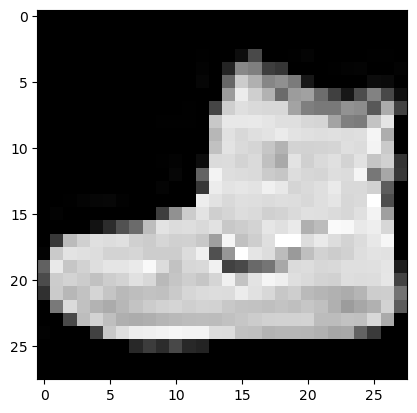

In [7]:
import matplotlib.pyplot as plt

plt.imshow(train_x[0], cmap = 'gray')
plt.show()

In [11]:
train_y[0] #9는 신발임을 확인

9

In [10]:
# 훈련데이터의 정답지가 numpy로 만들어져 있어서 
# 판다스로 셀 수가 없음
# 그래서 numpy를 사용하는 것
# return_counts = True를 하면 각 값에 대한 개수까지 확인 가능
import numpy as np
np.unique(train_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [13]:
# 벡터로 표현한 것 (가로 28 세로 28 픽셀로 만들어진 것)
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
# 문제집 : 2차원 행렬
# 현재의 데이터는 3차원으로 되어있음으로, 돌아가지 않음
# 그래서 데이터의 행렬을 수정해줘야함
# y는 1차원으로 되어 있슈
# 2차원으로 되어있는 픽셀을 하나의 열로 쭉 만드는 것

train_scaled = train_x.reshape(60000,784) #28*28 = 784
test_scaled = test_x.reshape(10000, 784) 

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_y)

DecisionTreeClassifier()

In [17]:
dt.score(test_scaled, test_y)

0.7882

In [19]:
import pandas as pd
pd.DataFrame(train_scaled)
# 한 행이 하나의 이미지

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


### 주성분 분석

In [27]:
from sklearn. decomposition import PCA

# 주성분 2개를 찾아라
# 대표할 수 있는 벡터값 50개를 찾아라
pca = PCA(n_components=50)

# train을 통해 대표하는 벡터위치를 찾았움
# 그래서 그 값을 기준으로 test에 적용
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

In [28]:
train_scaled.shape

(60000, 784)

In [29]:
train_pca.shape

(60000, 50)

In [30]:
dt= DecisionTreeClassifier()
dt.fit(train_pca, train_y)

DecisionTreeClassifier()

In [31]:
dt.score(test_pca, test_y)

0.7665

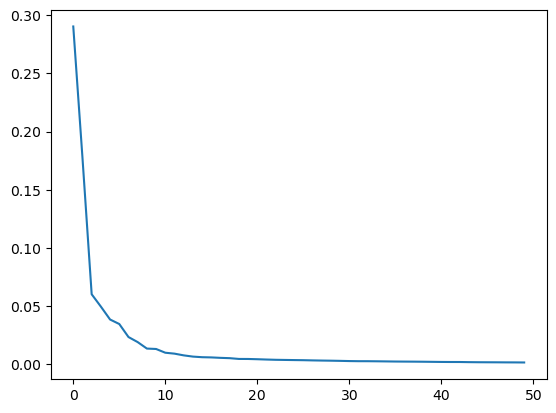

In [32]:
# 1 ~ 50등 주성분 순위를 알려주는 것
# 1등이 30% 정도 표현한다는 의미
# 10등까지 해도, 원본데이터를 대부분 표현할 수 있다는 것을 확인
plt.plot(pca.explained_variance_ratio_)

In [33]:
# 그래프를 파악한 결과, 10개만 있어도 됨!
pca = PCA(n_components=10)

train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

dt= DecisionTreeClassifier()
dt.fit(train_pca, train_y)

dt.score(test_pca, test_y)

0.7402

In [34]:
# 원본 대비 90% 설명하는 주성분의 갯수를 찾아라
pca = PCA(n_components=0.9)

train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

train_pca.shape

(60000, 84)

In [35]:
# 원본 대비 90% 설명하는 주성분의 갯수를 찾아라
pca = PCA(n_components=0.99)

train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

train_pca.shape

(60000, 459)

In [36]:
dt= DecisionTreeClassifier()
dt.fit(train_pca, train_y)

dt.score(test_pca, test_y)

0.7511

In [37]:
pima = pd.read_csv('실습 파일/pima_indians.csv')
pima['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

### K-Fold 교차검증
K개 만큼 등분해서 1~K번으로 평가 나머지로 학습 (총 k번 평가)

### 계층별 K-Fold 교차검증
비율을 맞춰서 K개만큼 등분하는 것

In [38]:
# K-Fold 교차검증
from sklearn.model_selection import cross_val_score

X = pima.iloc[:,:-1].to_numpy()
y = pima['Class'].to_numpy()

dt = DecisionTreeClassifier()

scores = cross_val_score(dt, X, y, cv=5)
scores

array([0.68181818, 0.66883117, 0.72077922, 0.77124183, 0.71895425])

In [41]:
# 계층별 K-Fold 교차검증
from sklearn.model_selection import StratifiedKFold

X = pima.iloc[:,:-1].to_numpy()
y = pima['Class'].to_numpy()

# 데이터를 적절하게 섞어서
# 정답지 비율까지 맞춰서 5등분 하겠다
skf = StratifiedKFold(n_splits=5, shuffle =True)

scores = cross_val_score(dt,X,y,cv=skf)
scores

array([0.63636364, 0.7012987 , 0.70779221, 0.70588235, 0.67973856])

### LeaveOneOut
전체 데이터 갯수 중 1개를 빼고 진행하는 것

예를 들어, 전체 데이터가 100개라면, 1개로 평가, 99개로 학습
이걸 100번 진행

In [44]:
# 성능을 올리는 게 아닌데 왜 하냐?
# 75%? 92%? 어떤 정확도가 모델의 정확도인지 모르니깐,
# 왜냐면 랜덤으로 test와 train을 구분해서 학습하는 거니깐

#그래서 교차검증을 통해서 
# 등분을 다 나눠서 한 번씩 해보는것
# 모든 데이터를 다 학습해서 평균내는 것, 그리고 신뢰도도 올라감

from sklearn.model_selection import LeaveOneOut

X = pima.iloc[:, :-1].to_numpy()
y = pima['Class'].to_numpy()

loo = LeaveOneOut()

scores = cross_val_score(dt, X, y, cv = loo)
scores

array([1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0.

In [47]:
from sklearn.model_selection import GridSearchCV

X = pima.iloc[:, :-1].to_numpy()
y = pima['Class'].to_numpy()

# max_depth : 결정트리 최대 깊이, 5층까지 들어가서 멈춰라! 과대적합 방지
# min_samples_split : 노드를 분할하기 위한 최소 샘플 수 (노드 안에 포함되는 값들이 10개 이상이어야 한다)
# 하나면 분리 못하니깐 최소 샘플 스필릿은 2부터!!
# min_samples_leaf : 가져야 하는 최소 노드 갯수, 5개까지 노드는 만들어야 함
# dt = DecisionTreeClassifier(max_depth=5,
#                            min_samples_split=10,
#                            min_samples_leaf=5)


# 경우의 수 6*5*4 
# max_depth : none은 지구 끝까지 가는 것
dic = {"max_depth":[None, 1,2,3,4,5],
      "min_samples_split":[2,3,4,5],
      "min_samples_leaf":[1,2,3,4]}

dt = DecisionTreeClassifier()

a = GridSearchCV(dt,dic,cv = 5, scoring='accuracy')
a.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [48]:
# 가장 좋은 파라미터 값을 확인할 수 있움
a.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [49]:
result = pd.DataFrame(a.cv_results_)
result.to_excel("생성 파일/dt_result.xlsx")

In [50]:
# 이 과정에서는 데이터를 분리안해서 애매하지만 
# 여튼 이렇게 예측에 사용할 수 있음
# 가장 좋은 파라미터 값을 가진 모델을 불러와서 사용할 수 있음

model = a.best_estimator_

pred = model.predict(X)
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [1]:
import pandas as pd
import numpy as np

In [2]:
df2 = pd.read_csv("실습 파일/12_Data.csv")
df2

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Radius,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim
0,842302,M,17.99,122.80,1001.0,10.38,0.12,0.27760,0.30010,0.1471,...,1.0950,8.589,153.40,0.9053,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062
1,842517,M,20.57,132.90,1326.0,17.77,0.08,0.07864,0.08690,0.0702,...,0.5435,3.398,74.08,0.7339,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035
2,84300903,M,19.69,130.00,1203.0,21.25,0.11,0.15990,0.19740,0.1279,...,0.7456,4.585,94.03,0.7869,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046
3,84348301,M,11.42,77.58,386.1,20.38,0.14,0.28390,0.24140,0.1052,...,0.4956,3.445,27.23,1.1560,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092
4,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.13280,0.19800,0.1043,...,0.7572,5.438,94.44,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,142.00,1479.0,22.39,0.11,0.11590,0.24390,0.1389,...,1.1760,7.673,158.70,1.2560,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042
565,926682,M,20.13,131.20,1261.0,28.25,0.10,0.10340,0.14400,0.0979,...,0.7655,5.203,99.04,2.4630,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025
566,926954,M,16.60,108.30,858.1,28.08,0.08,0.10230,0.09251,0.0530,...,0.4564,3.425,48.55,1.0750,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039
567,927241,M,20.60,140.10,1265.0,29.33,0.12,0.27700,0.35140,0.1520,...,0.7260,5.772,86.22,1.5950,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062


### 데이터 불균형 처리
성능 향상시키는 방법 중 하나
- 오버샘플링 : 소수 클래스를 늘려서 균형을 맞춤

- 언더샘플링 : 다수 클래스를 줄여서 균형을 맞춤
    - 무작위로 비율이 많은 쪽의 데이터를 줄여서 맞춤

In [3]:
df2['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

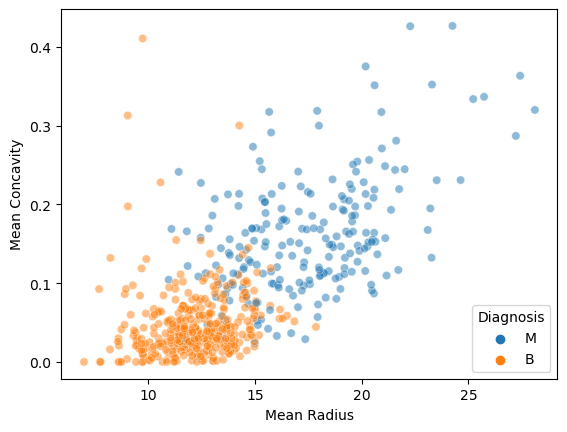

In [4]:
import seaborn as sns
sns.scatterplot(data=df2, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Diagnosis', alpha = 0.5)

In [6]:
from imblearn.under_sampling import RandomUnderSampler

X = df2[['Mean Radius','Mean Concavity']]
y = df2['Diagnosis']

In [7]:
# 랜덤으로 줄여서 212개로 맞추는 것
y.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 기존의 방법

X = X.to_numpy()
y = y.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X,y)

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

pred = dt.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           B       0.93      0.91      0.92        94
           M       0.84      0.88      0.86        49

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.89       143
weighted avg       0.90      0.90      0.90       143



#### RandomUnderSampler

In [11]:
# 언더샘플링 진행

X = df2[['Mean Radius','Mean Concavity']]
y = df2['Diagnosis']

sampling_model = RandomUnderSampler()

X_resample, y_resample = sampling_model.fit_resample(X,y)

In [12]:
y_resample.value_counts()

Diagnosis
B    212
M    212
Name: count, dtype: int64

In [13]:
X_resample['Target'] = y_resample

<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

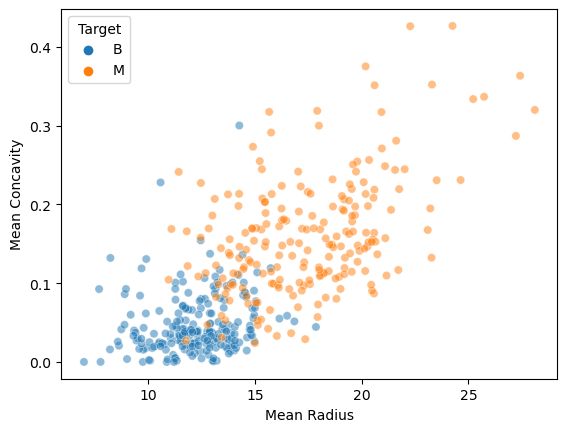

In [14]:
sns.scatterplot(data=X_resample, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Target', alpha = 0.5)

#### Link Sampling
X와 y가 겹치는 부분을 함께 삭제 시켜서 언더 샘플링

In [15]:
from imblearn.under_sampling import TomekLinks

sampling_model = TomekLinks()
X_resample, y_resample = sampling_model.fit_resample(X,y)

In [17]:
# 기존 357 
# 겹치는 부분이 많이 없어서 적게 줄어든듯!
y_resample.value_counts()

Diagnosis
B    342
M    212
Name: count, dtype: int64

In [18]:
X_resample['Target'] = y_resample

<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

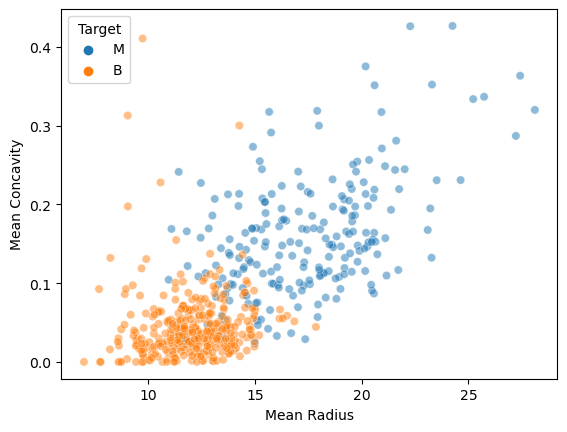

In [19]:
sns.scatterplot(data=X_resample, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Target', alpha = 0.5)

#### Edited Nearest Neghbors (ENN)
다수 클래스의 데이터를 특정 k개씩 묶어서 인접한 데이터가 많은 쪽을 삭제

Diagnosis
B    294
M    212
Name: count, dtype: int64


<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

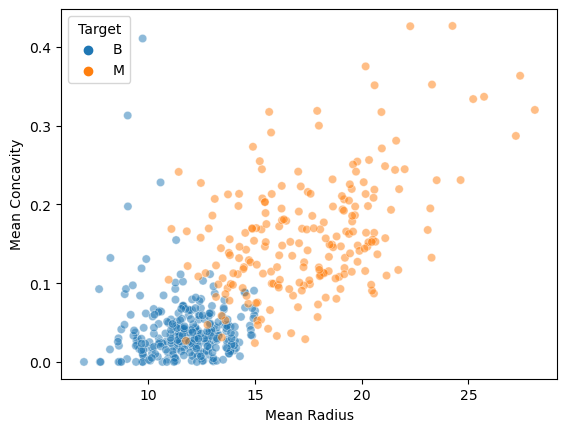

In [23]:
from imblearn.under_sampling import EditedNearestNeighbours

sampling_model = EditedNearestNeighbours()
X_resample, y_resample = sampling_model.fit_resample(X,y)

print(y_resample.value_counts())

X_resample['Target'] = y_resample
sns.scatterplot(data=X_resample, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Target', alpha = 0.5)

### 오버샘플링
#### RandomOverSampler
소수의 데이터를 복사해서 붙여넣기하는 것과 비슷함           
그래서 과대적합이 발생할 위험이 큼

Diagnosis
M    357
B    357
Name: count, dtype: int64


<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

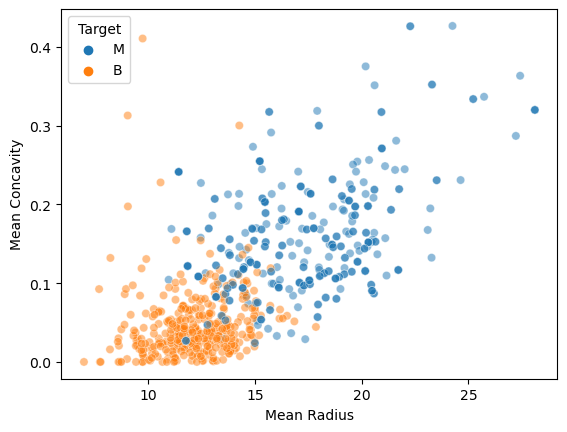

In [25]:
from imblearn.over_sampling import RandomOverSampler

sampling_model = RandomOverSampler()
X_resample, y_resample = sampling_model.fit_resample(X,y)

print(y_resample.value_counts())

X_resample['Target'] = y_resample
sns.scatterplot(data=X_resample, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Target', alpha = 0.5)

#### SMOTE
소수 클래스에서 가상의 선을 만들어서 데이터를 생성  

많이 사용하지만, 소수클래스가 많이 밀집해있는 곳에 생성되는 것은 아무 의미가 없음     
그래서 구분하기 힘든 구간에 가중치를 줘서 오버샘플링하는 방법이 만들어짐          
=> ADASYN (Adaptive Synthetic Sampling)

Diagnosis
M    357
B    357
Name: count, dtype: int64


<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

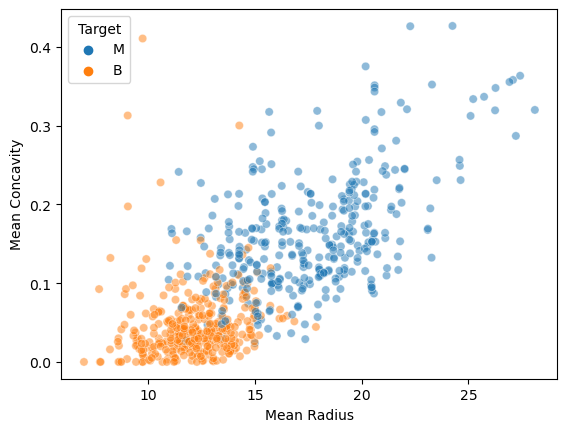

In [26]:
from imblearn.over_sampling import SMOTE

sampling_model = SMOTE()
X_resample, y_resample = sampling_model.fit_resample(X,y)

print(y_resample.value_counts())

X_resample['Target'] = y_resample
sns.scatterplot(data=X_resample, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Target', alpha = 0.5)

#### ADASYN
SMOTE 에서 개선된 방법

Diagnosis
M    362
B    357
Name: count, dtype: int64


<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

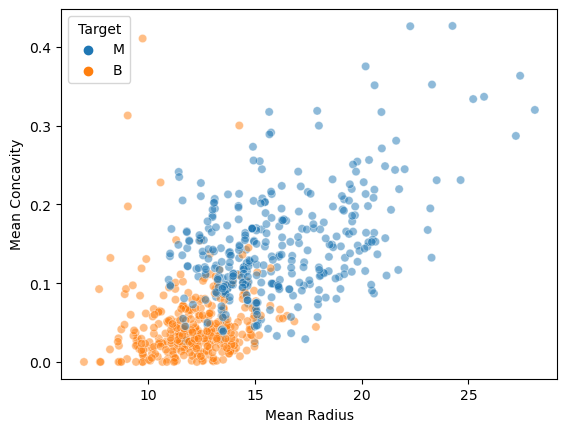

In [28]:
from imblearn.over_sampling import ADASYN

sampling_model = ADASYN()
X_resample, y_resample = sampling_model.fit_resample(X,y)

print(y_resample.value_counts())

X_resample['Target'] = y_resample
sns.scatterplot(data=X_resample, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Target', alpha = 0.5)

#### SMOTETomek
SMOTE 와 Link 가 결합된 방법   
SMOTE로 데이터를 늘리고, 겹쳐지는 부분이 생기면 제거하는 방법     
개인적으로 좋은 방법이라고 생각함

Diagnosis
M    347
B    347
Name: count, dtype: int64


<Axes: xlabel='Mean Radius', ylabel='Mean Concavity'>

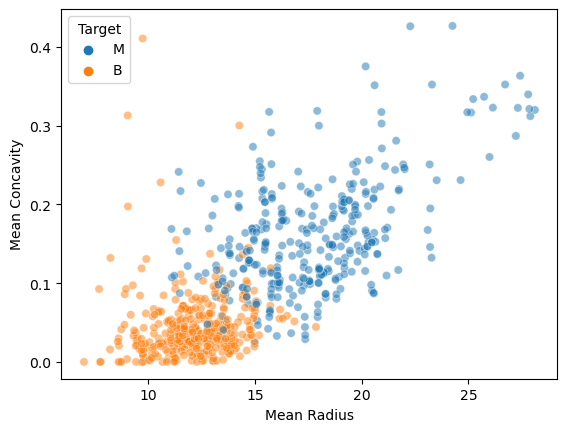

In [29]:
from imblearn.combine import SMOTETomek

sampling_model = SMOTETomek()
X_resample, y_resample = sampling_model.fit_resample(X,y)

print(y_resample.value_counts())

X_resample['Target'] = y_resample
sns.scatterplot(data=X_resample, x="Mean Radius",y = 'Mean Concavity', 
               hue = 'Target', alpha = 0.5)

In [32]:
sampling_model = SMOTETomek()
X_resample, y_resample = sampling_model.fit_resample(X,y)

train_x, test_x, train_y, test_y = train_test_split(X_resample,y_resample)

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

pred = dt.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           B       0.96      0.90      0.93        87
           M       0.90      0.96      0.93        84

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

